In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

from sklearn.metrics import accuracy_score

from sklearn import preprocessing

In [43]:
df=pd.read_csv("/users/aroua/downloads/breast-cancer_csv.csv")

In [44]:
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


In [45]:
def class_value(classe):
    if classe == 'recurrence-events':
        return 1
    else:
        return 0

In [46]:
label_encoder = preprocessing.LabelEncoder()
df['age'] = label_encoder.fit_transform(df['age'])
df['tumor-size'] = label_encoder.fit_transform(df['tumor-size'])
df['inv-nodes'] = label_encoder.fit_transform(df['inv-nodes'])
df = pd.get_dummies(df, columns=["breast","irradiat","node-caps","breast-quad","menopause"])
df['Class'] = df['Class'].apply(class_value)

In [47]:
select = [x for x in df.columns if x != "Class"]
x=df.loc[:, select]

In [48]:
y=df['Class']

In [49]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [50]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [51]:
y_pred = classifier.predict(x_test)

In [52]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [53]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]]


In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,f1_score,precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[35  1]
 [14  8]]


0.7413793103448276

In [55]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, classifier.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.75
Test set Accuracy:  0.7413793103448276


In [56]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 70.16 %
Standard Deviation: 1.31 %


In [57]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.364


In [58]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.889


In [59]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.516


In [60]:
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

Sensitivity :  0.9722222222222222


<AxesSubplot: ylabel='Class'>

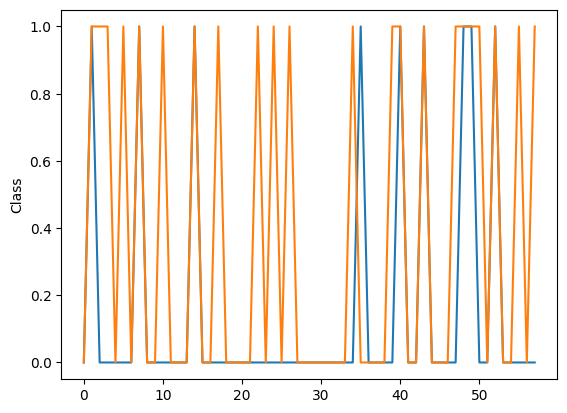

In [65]:
import seaborn as sns
sns.lineplot(x=range(0,len(x_test)),y=y_pred)
sns.lineplot(x=range(0,len(x_test)),y=y_test)